In [35]:
import numpy as np
from numpy import linalg
# PCA+visualization
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

In [44]:
def centered(A):
    return A-np.mean(A, axis=0)

def sum_of_outer_product(A, B):
    C = np.zeros((A.shape[1],A.shape[1]))
    for a, b in zip(A,B):
        C = C + np.outer(a, b)
    return C

def AO_Rotation(A, B): 
    # rotate B
    A_h = centered(A)
    B_h = centered(B)
    H = sum_of_outer_product(B_h,A_h)
    U,S,VT=linalg.svd(H)
    R = np.dot(U,VT)
    return np.dot(B,R)
    

In [64]:
google_pivot_vec = AO_Rotation(stack_pivot_vec, google_pivot_vec)

In [50]:
w2v_google_50d = np.load("/Users/zhang/MscProject_tweak2vec/word2vecModel/w2v_google_50d.npy")
w2v_pivots100_50d = np.load("/Users/zhang/MscProject_tweak2vec/word2vecModel/w2v_pivots100_50d_0.1.npy")
vocab_list = np.load('/Users/zhang/MscProject_tweak2vec/corpus/quora_vocab5.npy')

In [41]:
print(w2v_google_50d[1])
print(w2v_pivots100_50d[1])

[-0.6966534  -0.4016351  -0.1549023  -0.15343124  0.11273665 -0.20632797
 -0.05852845  0.18393464  0.04037216 -0.15603983 -0.12679     0.1046142
 -0.03136151 -0.09917641 -0.21953696 -0.0655791  -0.3572455  -0.07304936
  0.28290594  0.25940606  0.18046263 -0.18454191 -0.13335513 -0.11446908
 -0.09217896 -0.02864585  0.07994083 -0.35668796 -0.16788772 -0.09856568
 -0.05210084 -0.06661749  0.09986917  0.15961035 -0.12051732 -0.03440592
  0.02815557 -0.17301133 -0.1794618  -0.00421432 -0.1891277  -0.17107552
 -0.1458907  -0.08563197 -0.04394729 -0.05338894  0.11201006 -0.2840997
 -0.21458015  0.03424297]
[-0.61069733 -0.28587377 -0.03572964 -0.01999969  0.19926314 -0.18807139
 -0.00374765  0.10094376 -0.07623999 -0.04101926 -0.02894157  0.03351217
  0.07852096 -0.01705614 -0.24527752 -0.06136918 -0.23775153 -0.18538113
  0.27501443  0.1674429   0.016457   -0.20590273 -0.19755514 -0.12686346
 -0.04375162 -0.1273627   0.09120347 -0.39316246 -0.06907935 -0.01720579
 -0.04126128 -0.04455158 -0

In [51]:
google_pc = pca.fit_transform(w2v_google_50d)
pivots_pc = pca.fit_transform(w2v_pivots100_50d)

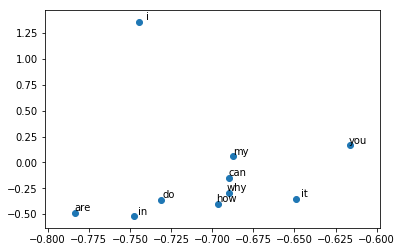

In [52]:
start = 0
end = 10
google_x = [w[0] for w in google_pc[start:end] ]
google_y = [w[1] for w in google_pc[start:end] ]
i=start
for a,b in zip(google_x,google_y):
    plt.text(a+0.005, b, vocab_list[i][0], ha='center', va= 'bottom',fontsize=10)
    i=i+1
plt.scatter(google_x, google_y)
plt.show()

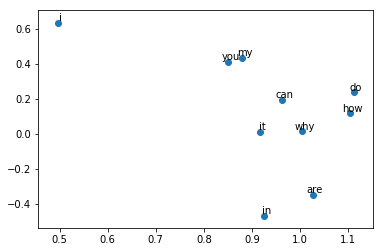

In [53]:
pivots_x = [w[0] for w in pivots_pc[start:end] ]
pivots_y = [w[1] for w in pivots_pc[start:end] ]
i=start
for a,b in zip(pivots_x,pivots_y):
    plt.text(a+0.005, b, vocab_list[i][0], ha='center', va= 'bottom',fontsize=10)
    i=i+1
plt.scatter(pivots_x, pivots_y)
plt.show()